<a href="https://colab.research.google.com/github/hitanshreedesai/2301031800023_Python/blob/main/Data_Cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("/content/Online Sales Data.csv")



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [11]:
df.head()

,Transaction ID,Date,Product Category,Product Name,Units Sold,Unit Price,Total Revenue,Region,Payment Method
0,10001,2024-01-01,Electronics,iPhone 14 Pro,2,999.99,1999.98,North America,Credit Card
1,10002,2024-01-02,Home Appliances,Dyson V11 Vacuum,1,499.99,499.99,Europe,PayPal
2,10003,2024-01-03,Clothing,Levi's 501 Jeans,3,69.99,209.97,Asia,Debit Card
3,10004,2024-01-04,Books,The Da Vinci Code,4,15.99,63.96,North America,Credit Card
4,10005,2024-01-05,Beauty Products,Neutrogena Skincare Set,1,89.99,89.99,Europe,PayPal


In [12]:
print(df.isnull().sum())

Transaction ID      0
Date                0
Product Category    0
Product Name        0
Units Sold          0
Unit Price          0
Total Revenue       0
Region              0
Payment Method      0
dtype: int64


In [13]:
df = df.dropna()

In [16]:
non_numeric_cols = df.select_dtypes(exclude=['number']).columns

for col in df.columns:
  if col not in non_numeric_cols:
    df[col] = df[col].fillna(df[col].mean())

In [19]:
median = df['Unit Price'].median()
df['Unit Price'] = np.where((df['Unit Price'] < (Q1 -1.5 * IQR)) | (df['Unit Price'] > (Q3 + 1.5 * IQR)), median, df['Unit Price'])

In [18]:
column_name = 'Total Revenue'

Q1 = df[column_name].quantile(0.25)
Q3 = df[column_name].quantile(0.75)

IQR = Q3 - Q1
outliers = df[(((df[column_name]<(Q1 - 1.5 * IQR)) | (df[column_name]>(Q3 + 1.5 * IQR))))]
print(outliers)

     Transaction ID        Date Product Category  \
0             10001  2024-01-01      Electronics   
6             10007  2024-01-07      Electronics   
7             10008  2024-01-08  Home Appliances   
12            10013  2024-01-13      Electronics   
18            10019  2024-01-19      Electronics   
35            10036  2024-02-05           Sports   
36            10037  2024-02-06      Electronics   
37            10038  2024-02-07  Home Appliances   
42            10043  2024-02-12      Electronics   
66            10067  2024-03-07      Electronics   
72            10073  2024-03-13      Electronics   
85            10086  2024-03-26  Home Appliances   
95            10096  2024-04-05           Sports   
102           10103  2024-04-12      Electronics   
120           10121  2024-04-30      Electronics   
132           10133  2024-05-12      Electronics   
138           10139  2024-05-18      Electronics   
162           10163  2024-06-11      Electronics   
216         

In [20]:
df.to_csv('/cleaned Online Sales Data.csv', index=False)

In [22]:
import matplotlib.pyplot as plt
import os

output_dir = '/kaggle/working'
os.makedirs(output_dir, exist_ok=True)

plt.savefig(os.path.join(output_dir,'sales_distribution_pie_chart.png'))
plt.show()

<Figure size 640x480 with 0 Axes>

(np.float64(-1.1), np.float64(1.1), np.float64(-1.1), np.float64(1.1))

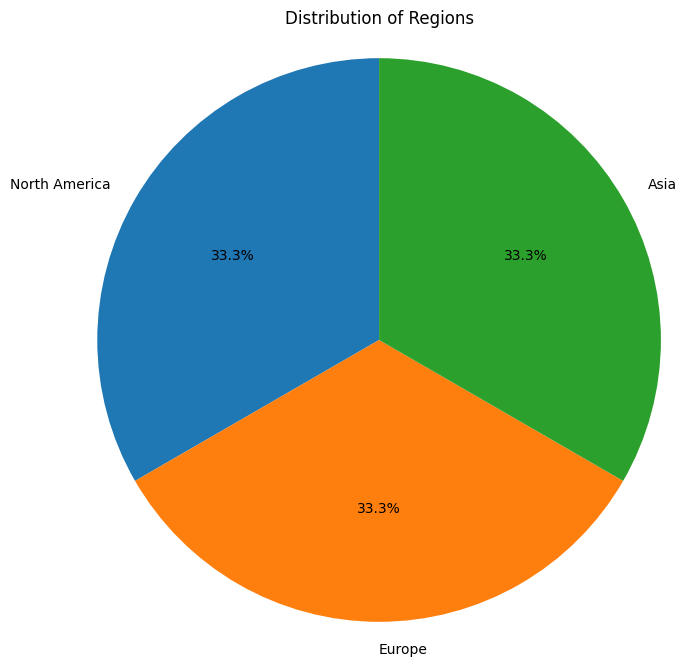

In [23]:
import matplotlib.pyplot as plt


region_counts = df['Region'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(region_counts, labels=region_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Regions')
plt.axis('equal')

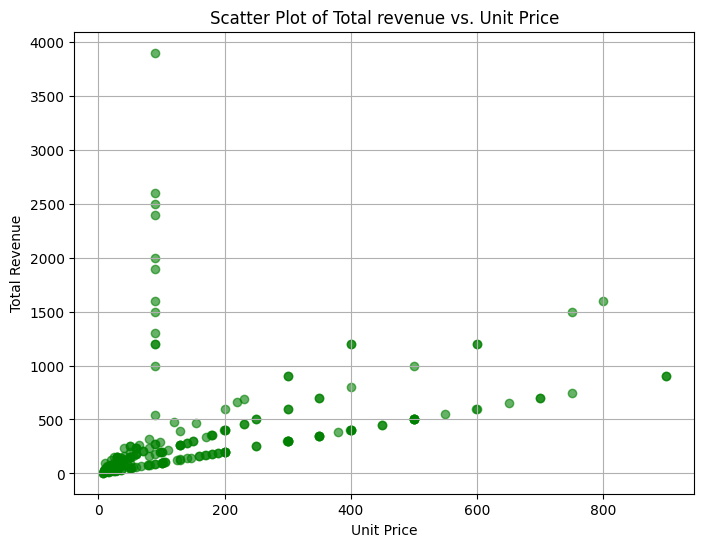

In [24]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8 , 6))
plt.scatter(df['Unit Price'], df['Total Revenue'],color = 'green', alpha=0.6)
plt.title('Scatter Plot of Total revenue vs. Unit Price')
plt.xlabel('Unit Price')
plt.ylabel('Total Revenue')
plt.grid(True)
plt.show()

<ipython-input-25-6d7274678925>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['Total Revenue'],shade=True, color='orange')


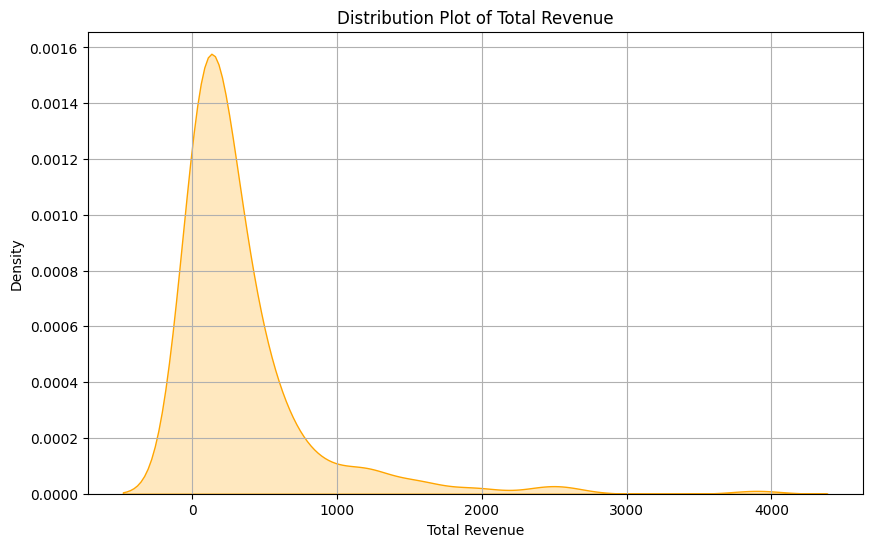

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10 , 6))
sns.kdeplot(df['Total Revenue'],shade=True, color='orange')
plt.title('Distribution Plot of Total Revenue')
plt.xlabel('Total Revenue')
plt.ylabel('Density')
plt.grid(True)
plt.show()

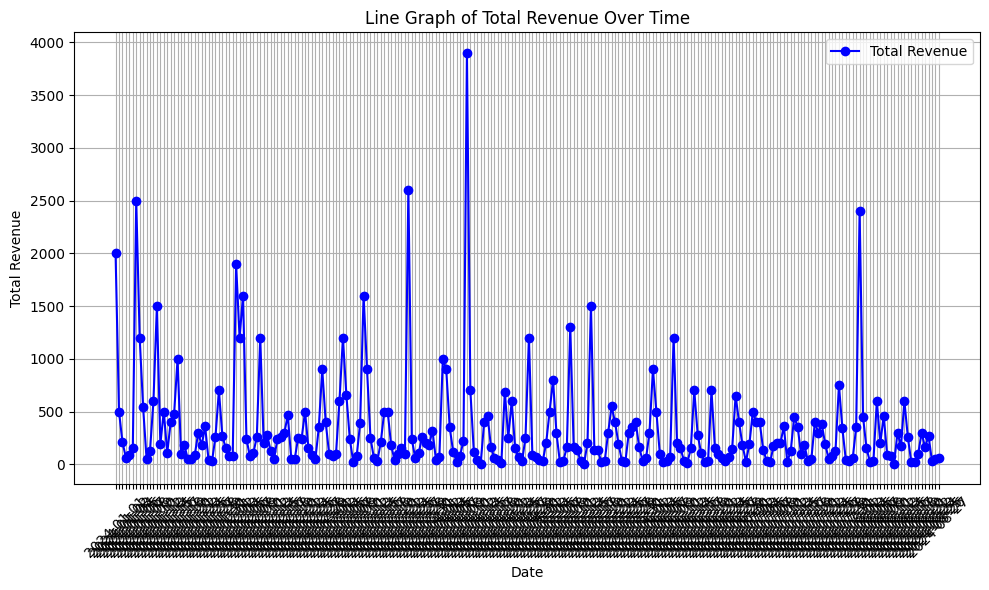

In [26]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10 , 6))
plt.plot(df['Date'], df['Total Revenue'], marker='o', linestyle='-', color='b', label='Total Revenue')
plt.title('Line Graph of Total Revenue Over Time')
plt.xlabel('Date')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

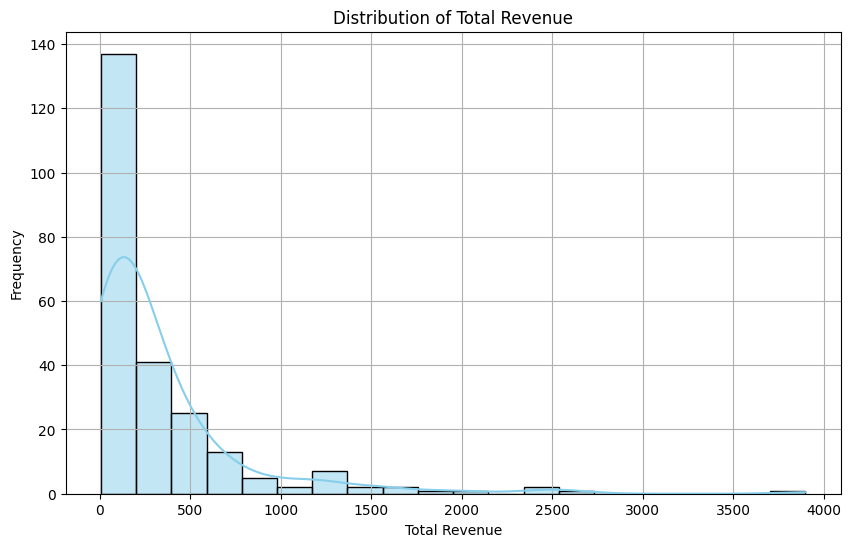

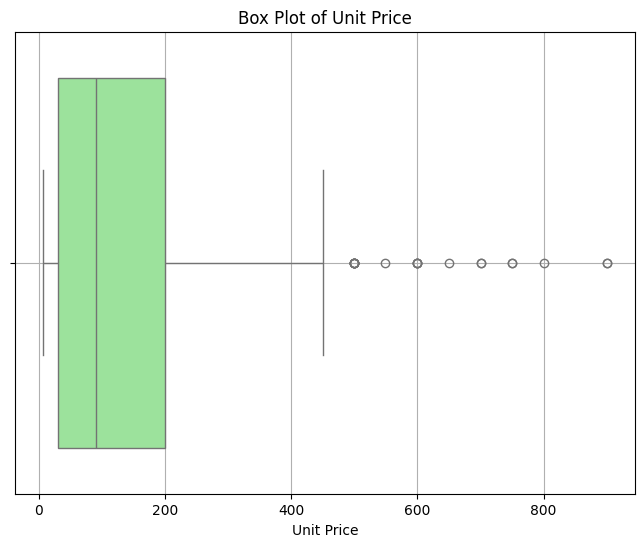

In [28]:
plt.figure(figsize=(10 , 6))
sns.histplot(df['Total Revenue'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Total Revenue')
plt.xlabel('Total Revenue')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()



plt.figure(figsize=(8 , 6))
sns.boxplot(x=df['Unit Price'], color='lightgreen')
plt.title('Box Plot of Unit Price')
plt.xlabel('Unit Price')
plt.grid(True)
plt.show()